In [108]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

train_transaction=pd.read_csv('/Users/matthewherrity/Downloads/ieee-fraud-detection/train_transaction.csv')

splitLen=int(len(train_transaction)*0.1)

Y=train_transaction.pop('isFraud').values

needsHelp=train_transaction.select_dtypes(include=[object])

needsHelp.fillna(value='M', inplace=True, axis=1)

enCode=preprocessing.OneHotEncoder()

enCode.fit(needsHelp)

Encoded= enCode.transform(needsHelp).toarray()

train_transaction.drop(needsHelp.columns, 1, inplace=True)

X_1=train_transaction.values

X=np.concatenate((X_1,labels), axis=1)

X=np.nan_to_num(X,0)

X=preprocessing.normalize(X)

X_Test=X[-splitLen:]

X_Train=X[:-splitLen]

del X

Y_Test=Y[-splitLen:]

Y_Train=Y[:-splitLen]

del Y


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


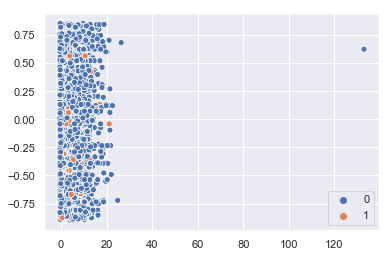

In [109]:
import seaborn as sns
train_transaction=pd.read_csv('/Users/matthewherrity/Downloads/ieee-fraud-detection/train_transaction.csv')
ta_mean=train_transaction['TransactionAmt'].mean()
ta_stdev=train_transaction['TransactionAmt'].std()

c1_mean=train_transaction['card1'].mean()
c1_stdev=train_transaction['card1'].mean()

TransactionAMT=[(x-ta_mean)/ta_stdev for x in train_transaction['TransactionAmt']]

CardOne=[(x-c1_mean)/c1_stdev for x in train_transaction['card1']]

sns.scatterplot(TransactionAMT, CardOne, hue=train_transaction['isFraud'].values )







In [110]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


logRegOne=LogisticRegression()

logRegOne=logRegOne.fit(X=X_Train,y=Y_Train)

logRegOne.score(X_Test,Y_Test)



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9625258238222644